<h2> 1. Import and warehouse data: </h2>

In [183]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
os.getcwd()

'C:\\Users\\Ashok\\puthon\\Great Learning\\Unsupervised learning project 2'

In [185]:
os.getcwd()
os.listdir()
car_attri=pd.read_json('Car-Attributes.json')
car_name=pd.read_csv('Car+name.csv')
print('car_attri',car_attri.shape)
print('car_name',car_name.shape)
print('car_attri',car_attri.columns)
print('car_name',car_name.columns)


car_attri (398, 8)
car_name (398, 1)
car_attri Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')
car_name Index(['car_name'], dtype='object')


In [186]:
car_attri['car_name']=car_name.values
car_data=car_attri

In [187]:
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<b>Export the final dataset</b>

In [188]:
car_data.to_csv(r'C:\\Users\\Ashok\\puthon\\Great Learning\\Unsupervised learning project 2\car_data.csv',index=False)
car_data.to_json(r'C:\\Users\\Ashok\\puthon\\Great Learning\\Unsupervised learning project 2\car_data.json')
car_data.to_excel(r'C:\\Users\\Ashok\\puthon\\Great Learning\\Unsupervised learning project 2\car_data.xlsx',index=False)

<b> Import the data from above steps into python</b>

In [189]:
car_data=pd.read_csv('car_data.csv')

In [190]:
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<b> Label encoding the column </b>

In [191]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# car_label=le.fit_transform(car_data['car_name'])

In [192]:
# car_data['car_label']=car_label

In [193]:
car_data.drop(car_name,axis=1,inplace=True)

The column car_name can be dropped since its a string data type and its unique for all instances

 <h2> 2. Data cleansing: </h2>

In [194]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null object
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [195]:
car_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

<b> Replace ? will null values and drop rows with null values </b>

In [196]:
car_data.replace('?',np.nan,inplace=True)
car_data=car_data.dropna(axis='index',how='any')
car_data['hp']=car_data['hp'].astype(float)

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg       392 non-null float64
cyl       392 non-null int64
disp      392 non-null float64
hp        392 non-null float64
wt        392 non-null int64
acc       392 non-null float64
yr        392 non-null int64
origin    392 non-null int64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


<h2>3 Data analysis & visualisation </h2>

<h3> univariate, bivariate and multivariate analysis </h3>

In [198]:
print((car_data.iloc[1].dtype))

float64


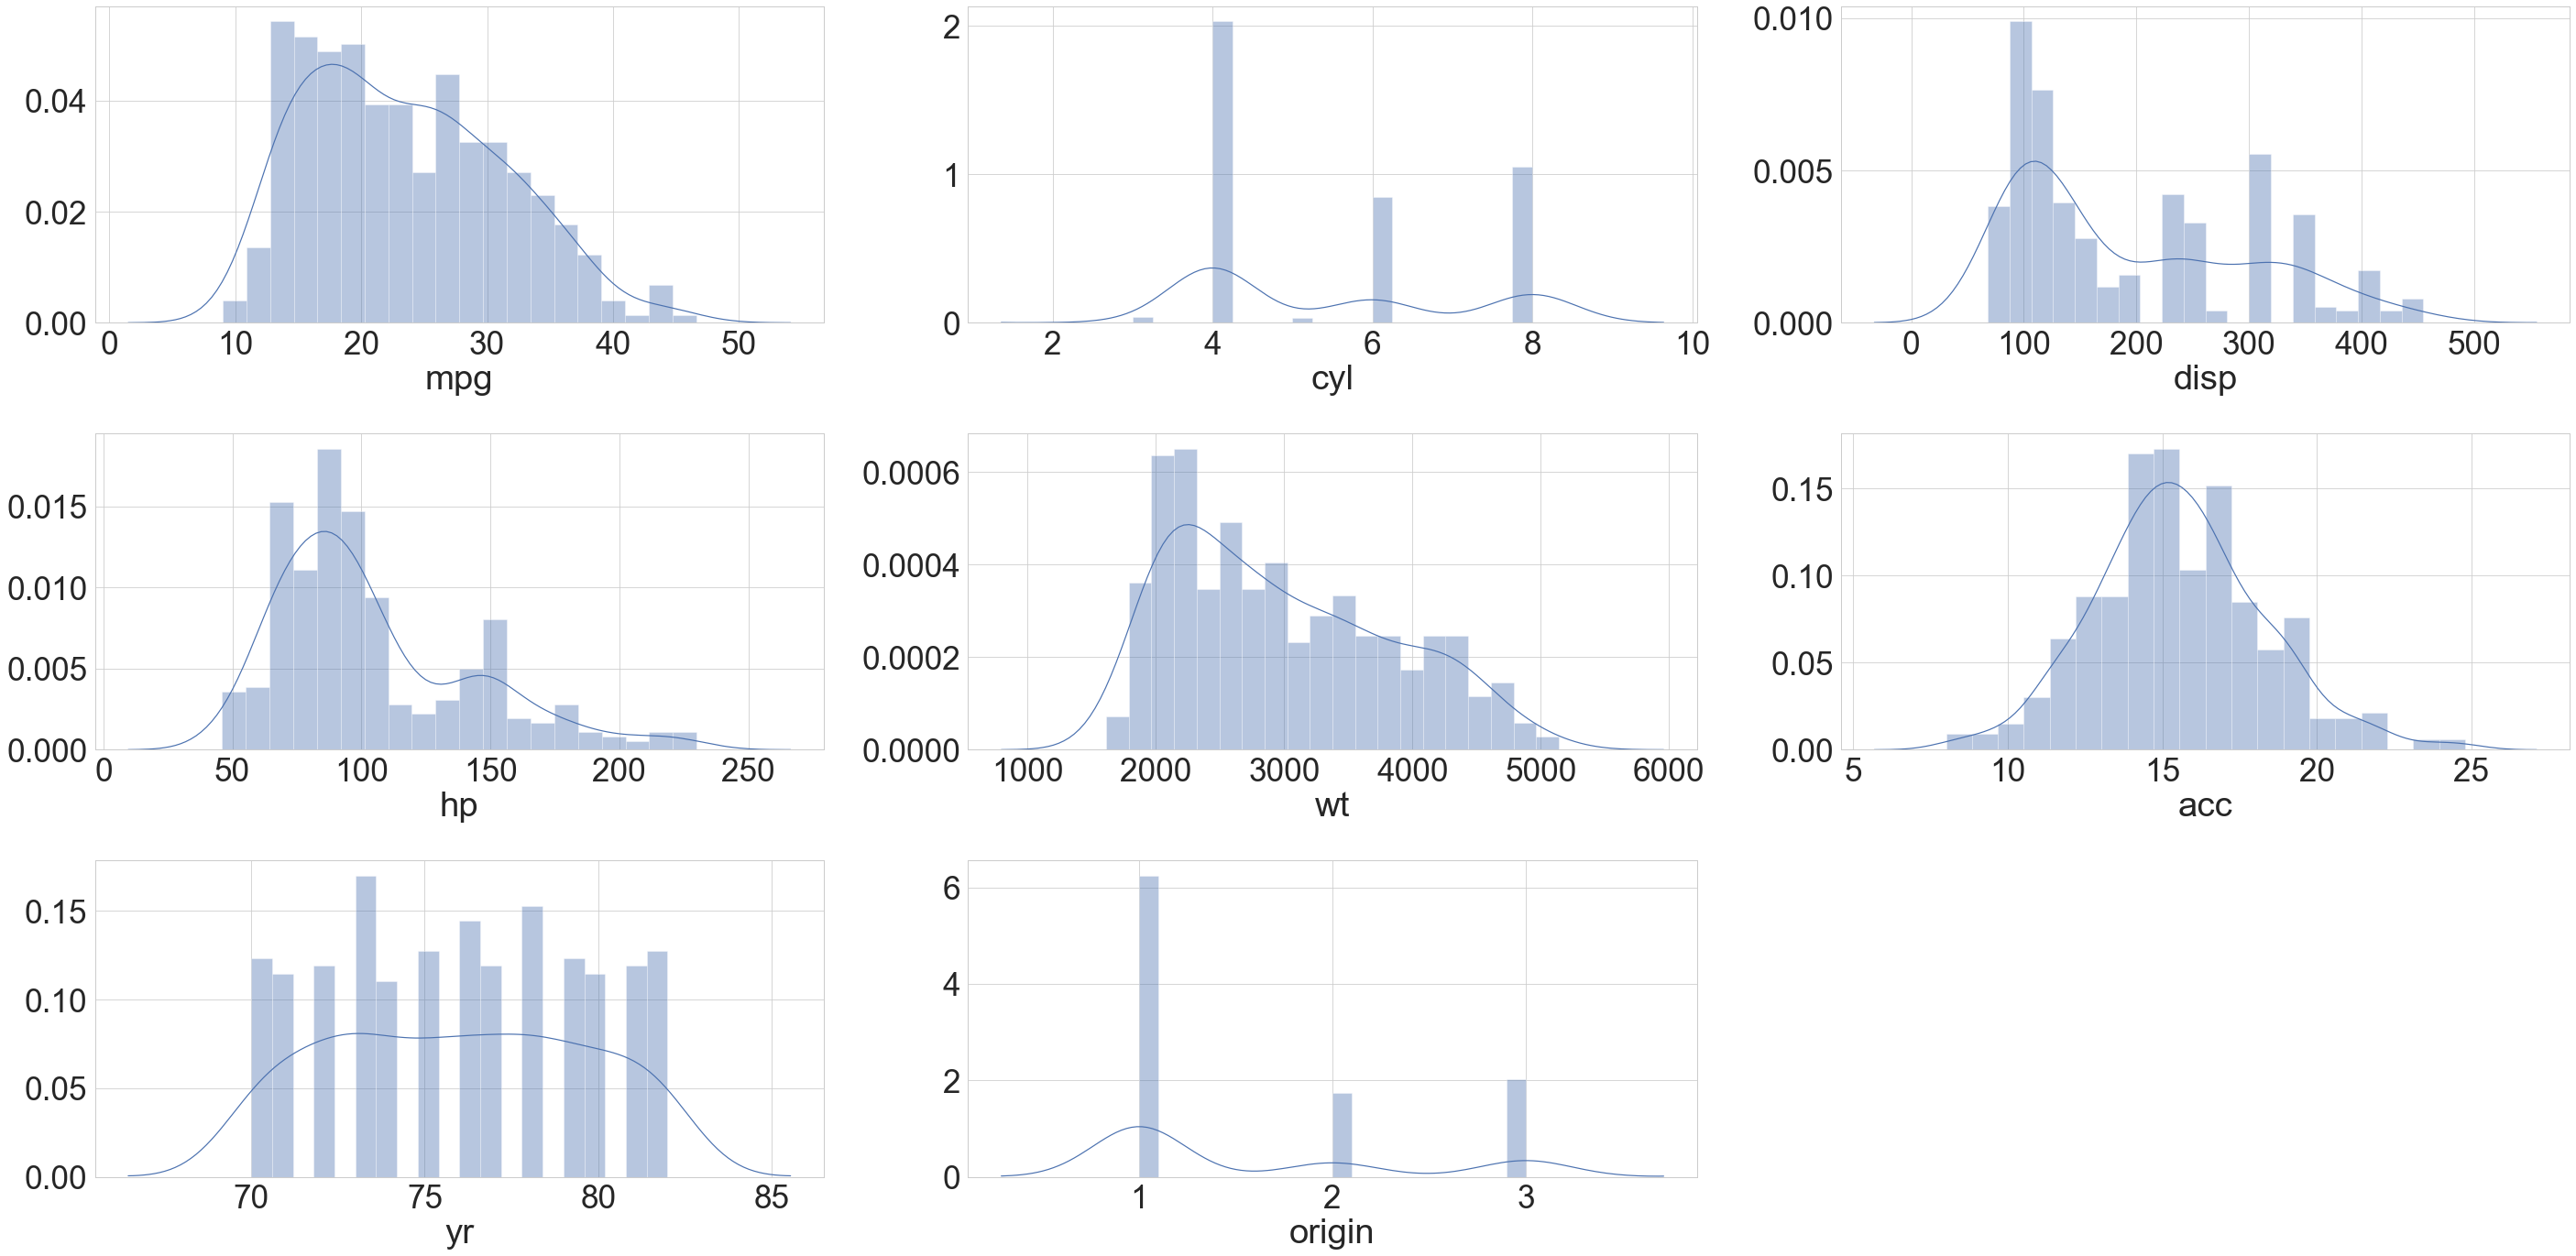

In [199]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=4)                                                  
plt.figure(figsize=(40,20)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)

for i,column in enumerate(car_data.columns):
    if str(car_data[column].dtype)!='object':
        sub_plt=plt.subplot(3,3,i+1)
        sns.distplot(car_data[column],bins=20)
        plt.tight_layout()


<Figure size 2880x1440 with 0 Axes>

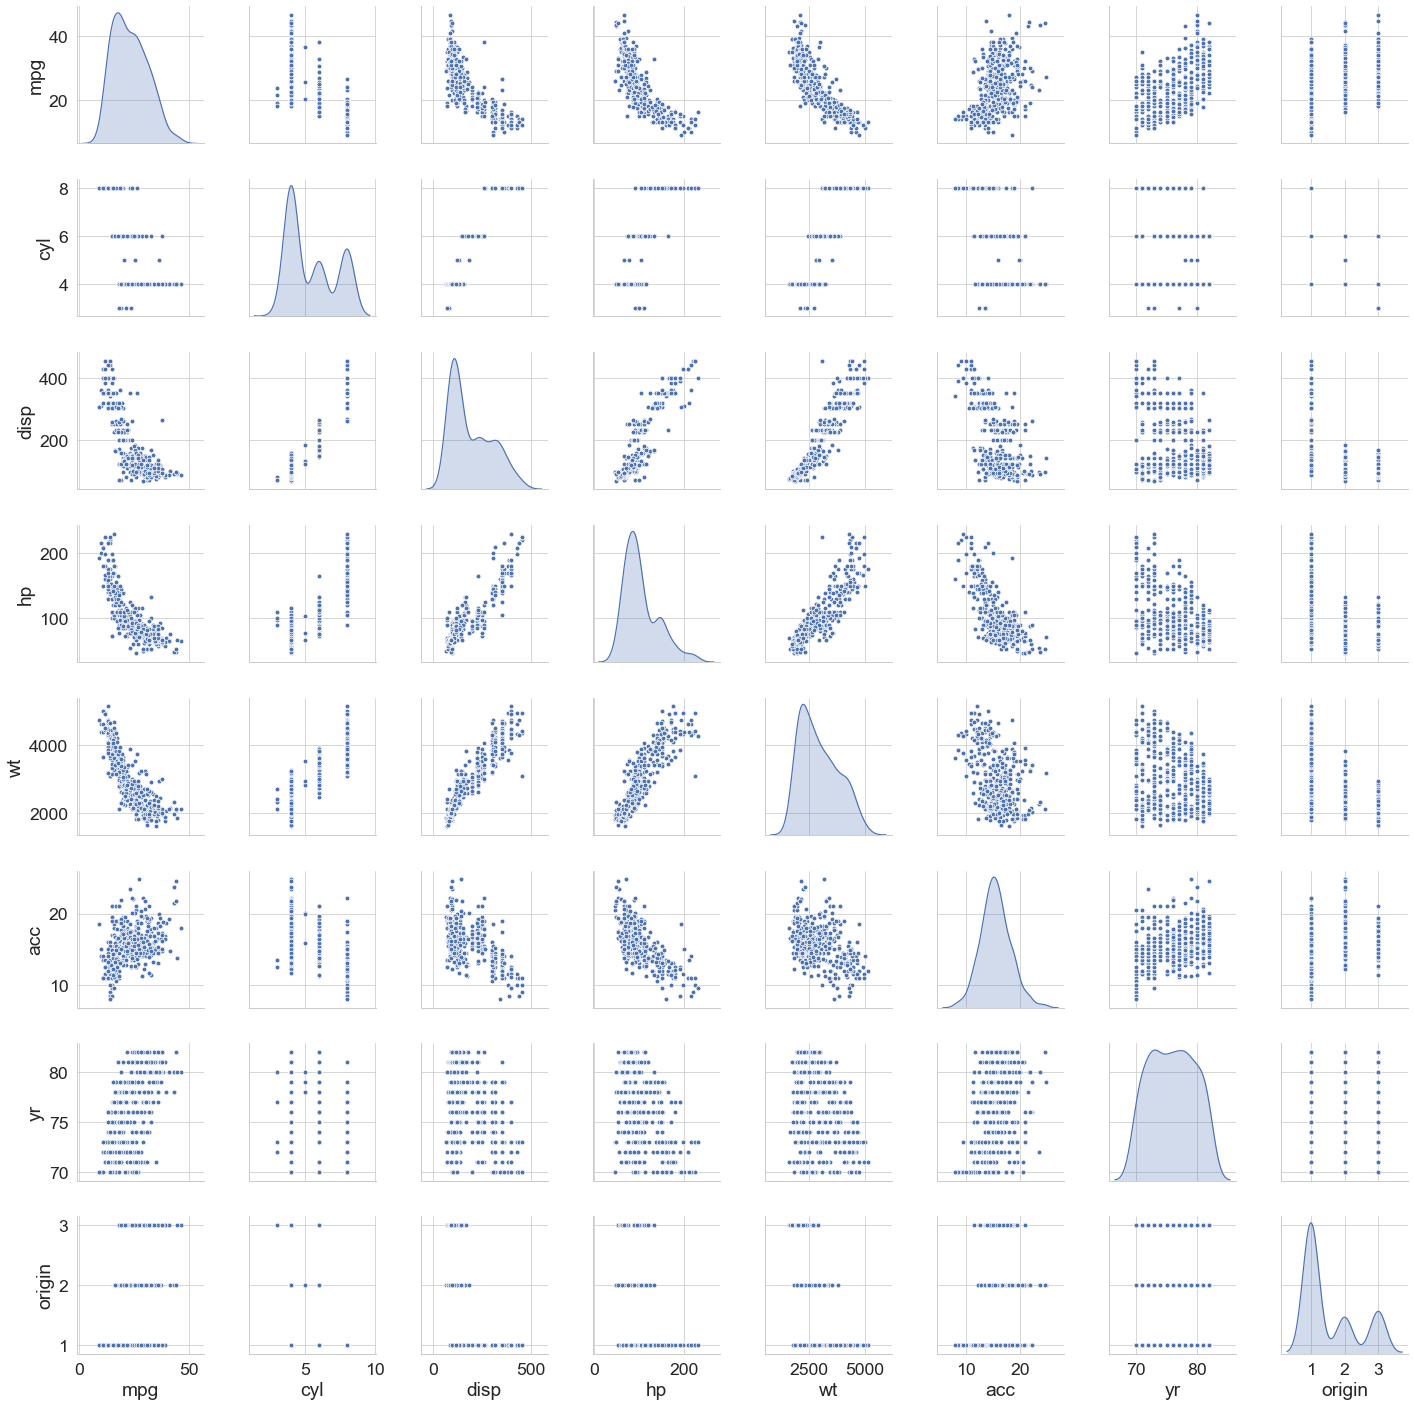

In [200]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)                                                  
plt.figure(figsize=(40,20)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
sns.pairplot(car_data,diag_kind='kde')

<h2> 4 Machine learning </h2>

In [201]:
from sklearn.cluster import KMeans

In [205]:
from scipy import stats
car_data_z=stats.zscore(car_data)

In [206]:
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [207]:
from sklearn.model_selection import train_test_split
# car_data.drop(car_name,axis=1,inplace=True)
x=car_data.drop('mpg',axis=1)
y=car_data['mpg']


<b> Linear Regression </b>

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(x,y)
y_predict=reg.predict(x)
reg.score(x, y)


0.82147807648106

In [213]:
from scipy import stats
car_data_z=stats.zscore(car_data)
car_data_z=pd.DataFrame(car_data_z,columns=car_data.columns)

In [214]:
car_data_z

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


<b> KMeans Clustering </b>

In [215]:
cluster_range=range(2,10)
errors=[]
for num_clusters in cluster_range:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(car_data_z)
    labels=kmeans.cluster_centers_
    errors.append(kmeans.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":errors})

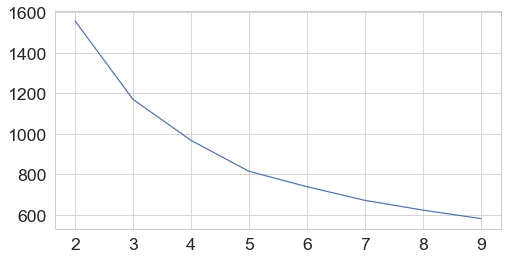

In [216]:
plt.figure(figsize=(8,4))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors)

<b> Agglomerative Clustering </b>

In [217]:
#Agg clustering using sklearn
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
y_hc=clustering.fit_predict(car_data_z)
print((y_hc))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 1 1 1 1 1 1 0 2 2 2 2 1 1 1 0 0 0 0 0
 2 2 2 2 2 2 2 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 2 2 2 2 0 1 1 1 1
 1 0 1 2 2 1 1 1 1 2 1 0 2 0 0 0 1 1 1 1 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0 2 2 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 0 0 0 0 3 3 1 1 0 0 0 0 1 1 1 1 1 2 3 0 0 2 2 2 2 1 1 1 1 1 2 0 2
 2 0 0 0 0 2 2 2 2 1 1 1 1 1 1 1 1 0 1 1 3 1 1 1 1 2 2 2 0 0 0 1 0 0 0 0 0
 0 2 2 2 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 2 2 2 2 2 2 2 2 1 1 1 1 3
 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 3 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1]


In [218]:
#Agg clustering using scipy
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

pdistance=pdist(car_data_z)
z=linkage(car_data_z,'complete')
c,coph_dist=cophenet(z,pdistance)
c

0.7385732265612737

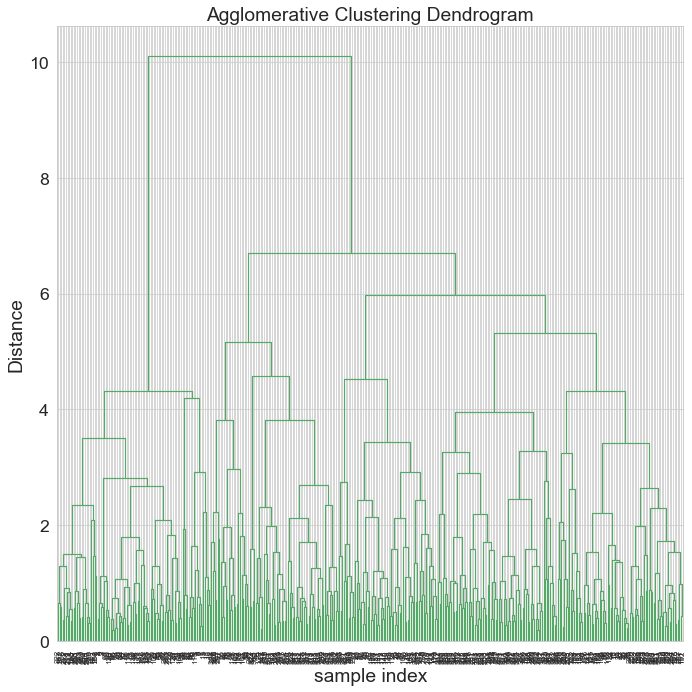

In [219]:
#dendrogram
plt.figure(figsize=(10,10))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,color_threshold=800,leaf_font_size=8)
plt.tight_layout()

<b> Add cluster labels to data frame <b>

In [220]:
car_data_z['cluster_label']=y_hc
car_data_z

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_label
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,2
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,2
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,2
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,2
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,2
...,...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641,1
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382,3
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641,1
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641,1


<h2> 5. outcomes of ML based methods </h2>

-  The optimal number of clusters range between 3 to 5 based on the elbow method. However from the dendrogram we can infer that 3 and 4 are the optimal number of clusters.


<b> Use linear regression model on different clusters separately </b>

In [221]:
filt=car_data_z['cluster_label']==1
data=car_data_z.loc[filt]

In [222]:
cluster_range=range(0,4)
for i in cluster_range:
    filt=car_data_z['cluster_label']==i
    data=car_data_z.loc[filt]
    x=data.drop('mpg',axis=1)
    y=data['mpg']
    reg = LinearRegression()
    reg.fit(x,y)
    y_predict=reg.predict(x)
    score=reg.score(x,y)
    print('score for cluster',i,'is',score)

score for cluster 0 is 0.5252424859816072
score for cluster 1 is 0.6991562546658012
score for cluster 2 is 0.6148015818431194
score for cluster 3 is 0.9937298845594936


<B> How using different models for different clusters will be helpful in this case </b>

- From the score values we can infer that the cluster 3 provides the maximum score which means the linear plane best fits the points
- Solving for different clusters provides an insight about the variance of the data points for each of the clusters.
- Performing the regression without clusters will not provide any information on how to improve the data inorder to find a best fit line.
- SVM over linearregression would have performed better in this case since SVM can fit the data with curvilinear lines.

<h2> Improvisation </h2>

- The dataset is limitied with just 390 data points which affects the performance.
- There were some outliers in columns like mpg.
- Column hp had some invalid data.

<h2> PROJECT 2 </h2>

In [228]:
data=pd.read_excel('Company.xlsx')
data

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [237]:
data.replace('Quality A',1,inplace=True)
data.replace('Quality B',2,inplace=True)


In [240]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
imputed_data=imputer.fit_transform(data)

In [246]:
imputed_df=pd.DataFrame(imputed_data,columns=data.columns)
imputed_df.replace(1,'Quality A',inplace=True)
imputed_df.replace(2,'Quality B',inplace=True)
imputed_df

,A,B,C,D,Quality
0,47.0,27.0,45.0,108.0,Quality A
1,174.0,133.0,134.0,166.0,Quality B
2,159.0,163.0,135.0,131.0,Quality B
3,61.0,23.0,3.0,44.0,Quality A
4,59.0,60.0,9.0,68.0,Quality A
...,...,...,...,...,...
56,200.0,186.0,185.0,179.0,Quality B
57,137.0,182.0,165.0,199.0,Quality B
58,88.0,39.0,9.0,102.0,Quality A
59,180.0,157.0,192.0,198.0,Quality B


<b> improvements</b>

- Increase is data points will result in better clasiification of the data.
- Additional features might be useful. Also feature engineering can be done for obtaining additional features